# Loading in the Data

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [16]:
df = pd.read_csv("C://Users//Houst//Downloads//FastFoodNutrition.csv")
df.shape

(1147, 14)

In [17]:
df.dtypes

Company                  object
Item                     object
Calories                 object
Calories from\nFat       object
Total Fat\n(g)           object
Saturated Fat\n(g)       object
Trans Fat\n(g)           object
Cholesterol\n(mg)        object
Sodium \n(mg)            object
Carbs\n(g)               object
Fiber\n(g)               object
Sugars\n(g)              object
Protein\n(g)             object
Weight Watchers\nPnts    object
dtype: object

In [18]:
# List of columns to convert to numeric
numeric_columns = [
    'Calories', 'Calories from\nFat', 'Total Fat\n(g)', 'Saturated Fat\n(g)',
    'Trans Fat\n(g)', 'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Carbs\n(g)',
    'Fiber\n(g)', 'Sugars\n(g)', 'Protein\n(g)', 'Weight Watchers\nPnts'
]

# Convert object columns to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(df.dtypes)

Company                   object
Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object


In [44]:
df = df.drop(columns=['Company', 'Item'])
#this drops the columns that are not floats

#DO NOT WORRY ABOUT ERROR
# if you run this and get error it means the columns have already been dropped and it can not find them

KeyError: "['Company', 'Item'] not found in axis"

In [45]:
print(df.dtypes)

Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object


# Fill in Missing Values (with avg)

In [46]:
df.isna().sum()

Calories                  14
Calories from\nFat       517
Total Fat\n(g)            68
Saturated Fat\n(g)        68
Trans Fat\n(g)            68
Cholesterol\n(mg)         28
Sodium \n(mg)             15
Carbs\n(g)                69
Fiber\n(g)                83
Sugars\n(g)               29
Protein\n(g)              68
Weight Watchers\nPnts    271
dtype: int64

In [36]:
# Replace missing values with the mean of each column
df_filled = df.fillna(df.mean())

# Check if all missing values have been filled
print(df_filled.isna().sum())

Calories                 0
Calories from\nFat       0
Total Fat\n(g)           0
Saturated Fat\n(g)       0
Trans Fat\n(g)           0
Cholesterol\n(mg)        0
Sodium \n(mg)            0
Carbs\n(g)               0
Fiber\n(g)               0
Sugars\n(g)              0
Protein\n(g)             0
Weight Watchers\nPnts    0
dtype: int64


In [33]:
df.head()

,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0


In [49]:
df.describe()

,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,1133.000000,630.000000,1079.000000,1079.000000,1079.000000,1119.000000,1132.000000,1078.000000,1064.000000,1118.000000,1079.000000,876.000000
mean,287.356575,117.555556,11.682576,4.068119,0.140871,40.647900,427.722615,38.946197,1.454887,24.067979,9.434662,310.270548
std,222.135591,131.909575,13.957331,5.025099,0.489773,68.058662,496.701818,31.654807,2.389581,32.369327,11.049859,238.635169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,17.000000,0.000000,2.000000,0.000000,142.750000
50%,240.000000,80.000000,8.000000,3.000000,0.000000,20.000000,190.000000,34.000000,0.000000,8.000000,7.000000,272.000000
75%,390.000000,170.000000,18.000000,6.000000,0.000000,50.000000,680.000000,52.000000,2.000000,40.000000,14.000000,430.000000
max,1220.000000,750.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,1317.000000


# Visuals Describing the Data

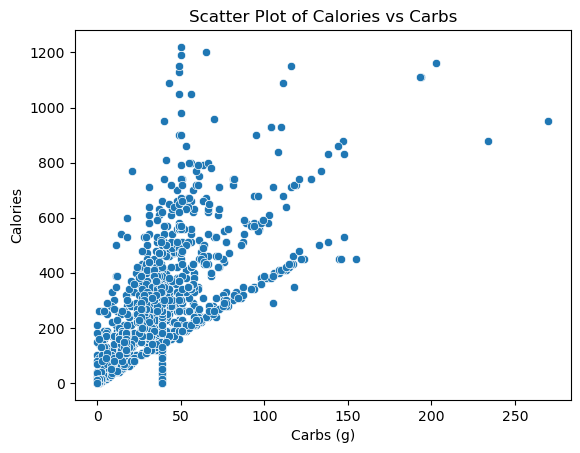

In [34]:
#finding the distribution of calories compared to carbs
sns.scatterplot(data=df_filled, x='Carbs\n(g)', y='Calories')

plt.xlabel('Carbs (g)')
plt.ylabel('Calories')
plt.title('Scatter Plot of Calories vs Carbs')

plt.show()

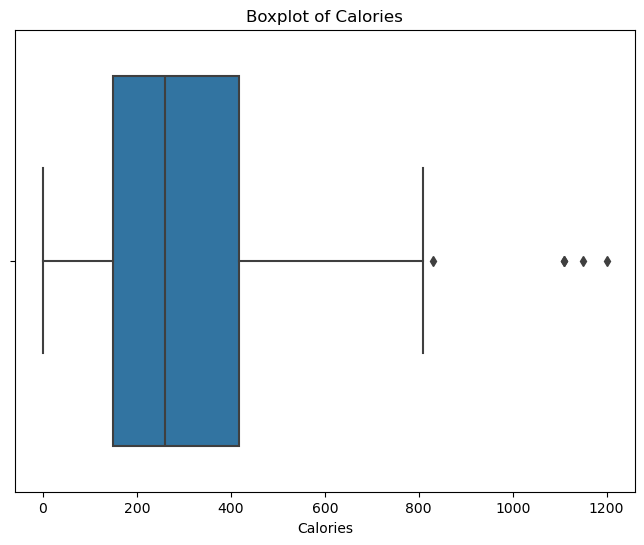

In [73]:
# Plot boxplot of 'Calories'
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_test)
plt.xlabel('Calories')
plt.title('Boxplot of Calories')
plt.show()

C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


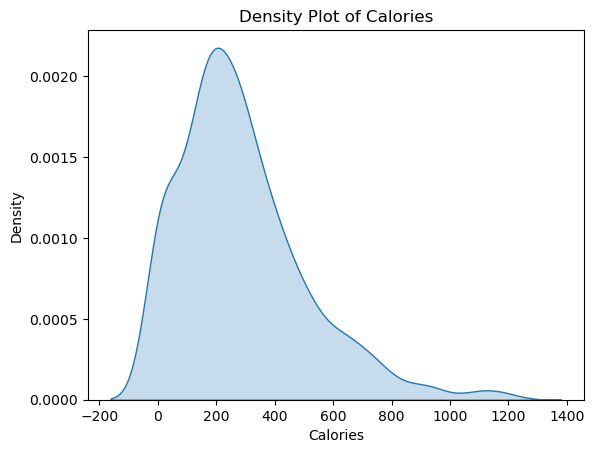

In [74]:
#seeing the density of calories
#this shows how most of the foods have an avg of 287.36 calories
sns.kdeplot(data=df_filled['Calories'], fill=True)

plt.xlabel('Calories')
plt.ylabel('Density')
plt.title('Density Plot of Calories')

plt.show()

# This is the Regression Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [57]:
X = df_filled.drop(columns=['Calories'])
y = df_filled['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

In [69]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse.round(2))
#MSE = 1496.37

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared.round(2))
#R^2 = .97

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse.round(2))
#RMSE = 38.68

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae.round(2))
#MAE = 20.99

Mean Squared Error: 1496.37
R-squared: 0.97
Root Mean Squared Error (RMSE): 38.68
Mean Absolute Error (MAE): 20.99


# Visual for our Model (real vs predicted)

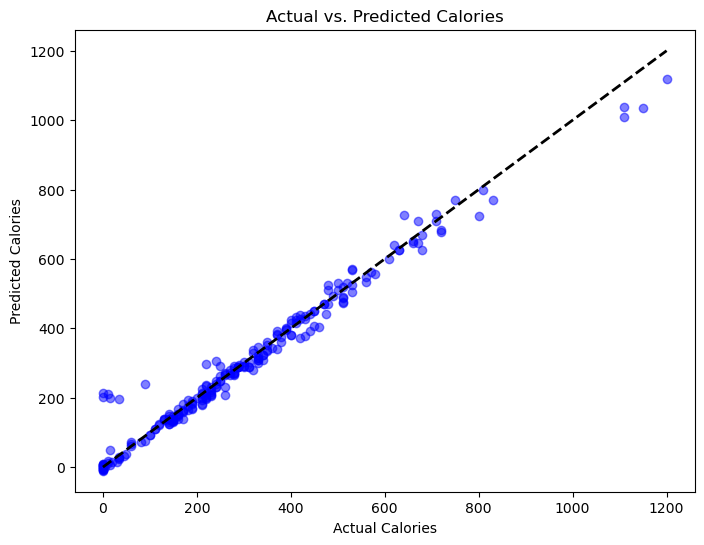

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs. Predicted Calories')
plt.show()